#### Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, precision_score, make_scorer, roc_auc_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from scipy.stats import skew



#### Lectura y elementos básicos del dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/psochando/Bank_Churn/main/Churn_Modelling.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Eliminamos columnas irrelevantes y vemos algunas estadísticas generales

In [4]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Comprobamos si hay duplicados

In [6]:
df.drop_duplicates()
# No hay

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Cómo de equilibrada está la variable target

In [7]:
df.Exited.value_counts()
# Hay muchos más que NO SE HAN IDO del banco (0) que los que SÍ SE HAN IDO (1)

0    7963
1    2037
Name: Exited, dtype: int64

Comprobamos el numero de categorías en la variable "Geography" para codificarla junto con "Gender"

In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df_encoded = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


### Tratamiento de outliers
Primero estudiamos la distribución de las variables no binarias y vemos cuántos y cuáles son los outliers

Coef. de asimetría en CreditScore: -0.07160660820092674
Outliers en CreditScore: [350 350 350 350 350 351 358 359 363 365 367 373 376 376 382] 

Coef. de asimetría en Age: 1.0113202630234552
Outliers en Age: [63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 66
 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66
 66 66 66 66 66 66 66 66 66 66 67 67 67 67 67 67 67 67 67 67 67 67 67 67
 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 68
 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 72 72 72 72 72 72 72 7

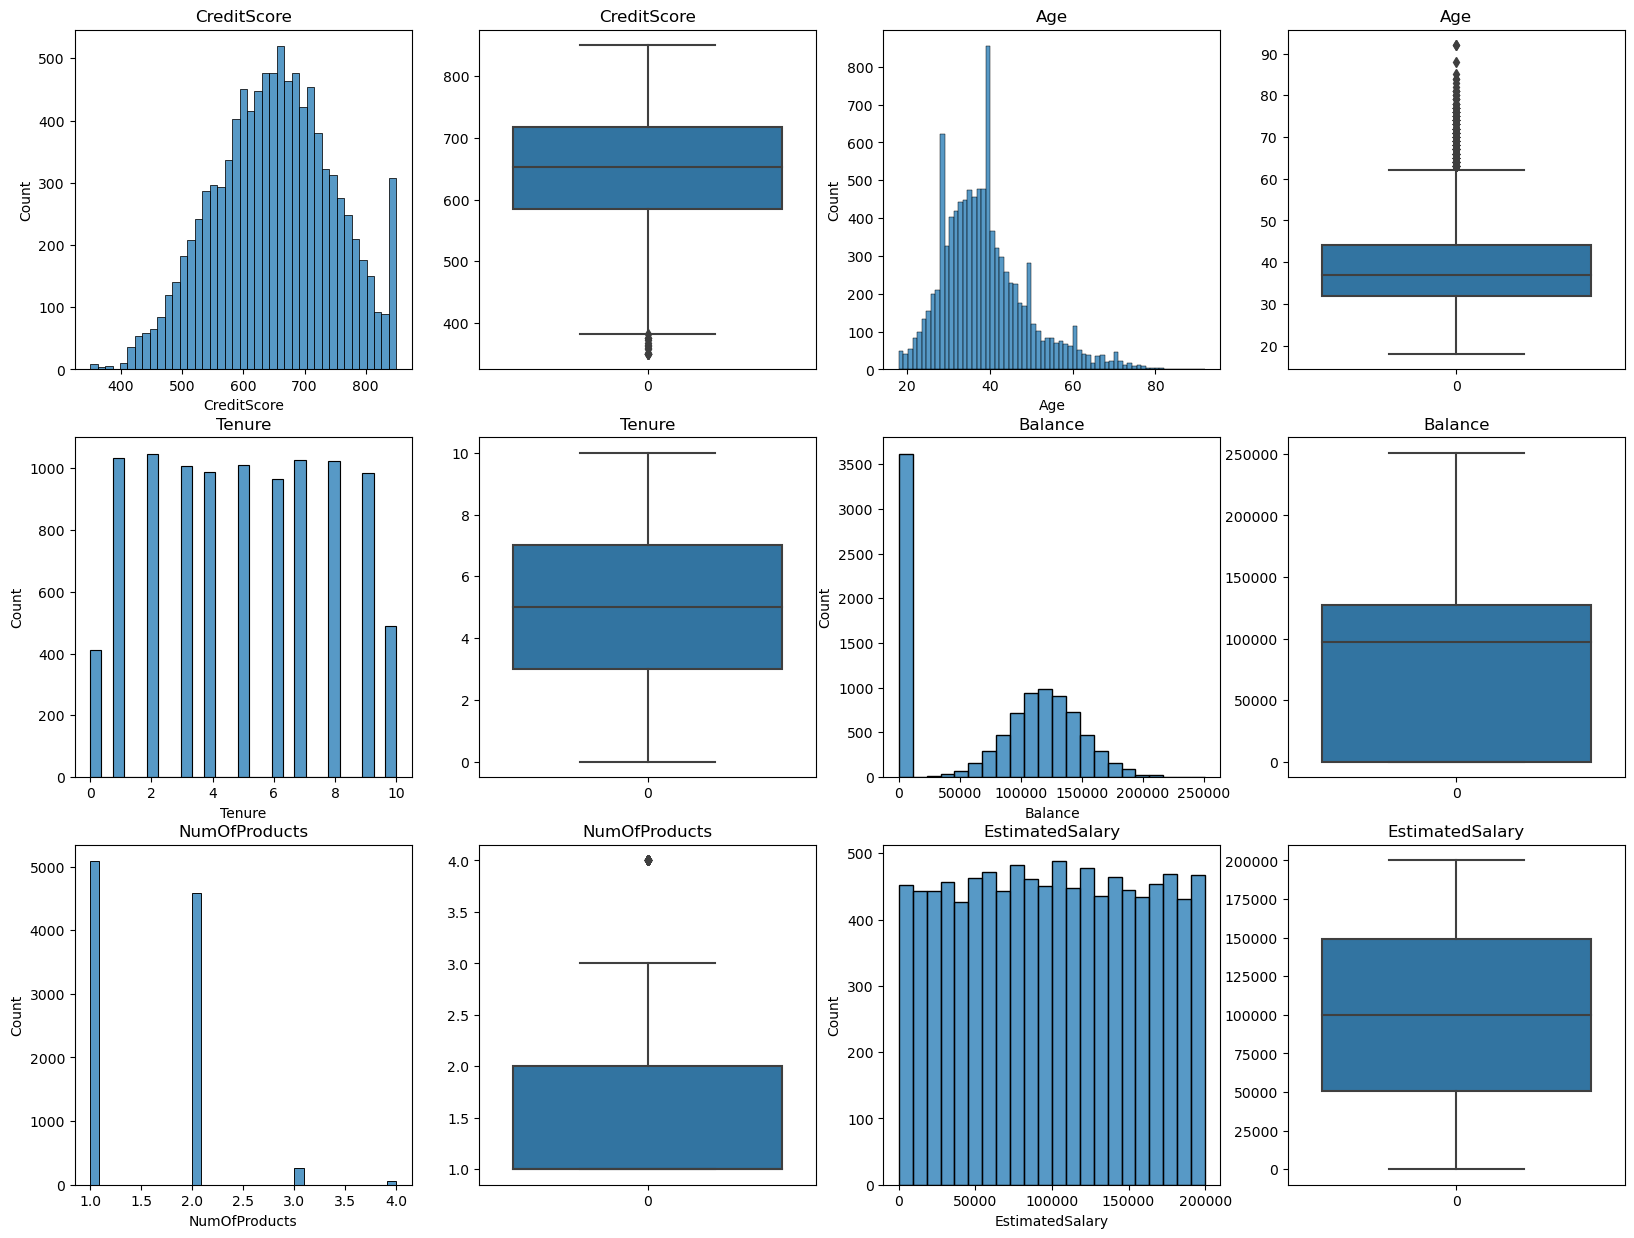

In [10]:
non_binary = []
for col in df_encoded.columns:
    if len(df_encoded[col].unique()) > 2:
        non_binary.append(col)

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

sns.histplot(df_encoded[non_binary[0]], ax=axes[0, 0])
axes[0, 0].set_title(f'{non_binary[0]}')
sns.boxplot(df_encoded[non_binary[0]], ax=axes[0, 1])
axes[0, 1].set_title(f'{non_binary[0]}')
# Coeficiente de asimetría de Fisher:
asymmetry = skew(df_encoded[non_binary[0]], bias=False)
print(f'Coef. de asimetría en {non_binary[0]}: {asymmetry}')
# Outliers:
q1 = df_encoded[non_binary[0]].quantile(0.25)
q3 = df_encoded[non_binary[0]].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded[non_binary[0]] < lower_bound) | (df_encoded[non_binary[0]] > upper_bound)][non_binary[0]]
print(f'Outliers en {non_binary[0]}: {outliers.sort_values(ascending = True).values} \n')

sns.histplot(df_encoded[non_binary[1]], ax=axes[0, 2])
axes[0, 2].set_title(f'{non_binary[1]}')
sns.boxplot(df_encoded[non_binary[1]], ax=axes[0, 3])
axes[0, 3].set_title(f'{non_binary[1]}')
# # Coeficiente de asimetría de Fisher
asymmetry = skew(df_encoded[non_binary[1]], bias=False)
print(f'Coef. de asimetría en {non_binary[1]}: {asymmetry}')
# Outliers:
q1 = df_encoded[non_binary[1]].quantile(0.25)
q3 = df_encoded[non_binary[1]].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded[non_binary[1]] < lower_bound) | (df_encoded[non_binary[1]] > upper_bound)][non_binary[1]]
print(f'Outliers en {non_binary[1]}: {outliers.sort_values(ascending = True).values} \n')

sns.histplot(df_encoded[non_binary[2]], ax=axes[1, 0])
axes[1, 0].set_title(f'{non_binary[2]}')
sns.boxplot(df_encoded[non_binary[2]], ax=axes[1, 1])
axes[1, 1].set_title(f'{non_binary[2]}')
# # Coeficiente de asimetría de Fisher
asymmetry = skew(df_encoded[non_binary[2]], bias=False)
print(f'Coef. de asimetría en {non_binary[2]}: {asymmetry}')
# Outliers:
q1 = df_encoded[non_binary[2]].quantile(0.25)
q3 = df_encoded[non_binary[2]].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded[non_binary[2]] < lower_bound) | (df_encoded[non_binary[2]] > upper_bound)][non_binary[2]]
print(f'Outliers en {non_binary[2]}: {outliers.sort_values(ascending = True).values} \n')

sns.histplot(df_encoded[non_binary[3]], ax=axes[1, 2])
axes[1, 2].set_title(f'{non_binary[3]}')
sns.boxplot(df_encoded[non_binary[3]], ax=axes[1, 3])
axes[1, 3].set_title(f'{non_binary[3]}')
# # Coeficiente de asimetría de Fisher
asymmetry = skew(df_encoded[non_binary[3]], bias=False)
print(f'Coef. de asimetría en {non_binary[3]}: {asymmetry}')
# Outliers:
q1 = df_encoded[non_binary[3]].quantile(0.25)
q3 = df_encoded[non_binary[3]].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded[non_binary[3]] < lower_bound) | (df_encoded[non_binary[3]] > upper_bound)][non_binary[3]]
print(f'Outliers en {non_binary[3]}: {outliers.sort_values(ascending = True).values} \n')

sns.histplot(df_encoded[non_binary[4]], ax=axes[2, 0])
axes[2, 0].set_title(f'{non_binary[4]}')
sns.boxplot(df_encoded[non_binary[4]], ax=axes[2, 1])
axes[2, 1].set_title(f'{non_binary[4]}')
# # Coeficiente de asimetría de Fisher
asymmetry = skew(df_encoded[non_binary[4]], bias=False)
print(f'Coef. de asimetría en {non_binary[4]}: {asymmetry}')
# Outliers:
q1 = df_encoded[non_binary[4]].quantile(0.25)
q3 = df_encoded[non_binary[4]].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded[non_binary[4]] < lower_bound) | (df_encoded[non_binary[4]] > upper_bound)][non_binary[4]]
print(f'Outliers en {non_binary[4]}: {outliers.sort_values(ascending = True).values} \n')

sns.histplot(df_encoded[non_binary[5]], ax=axes[2, 2])
axes[2, 2].set_title(f'{non_binary[5]}')
sns.boxplot(df_encoded[non_binary[5]], ax=axes[2, 3])
axes[2, 3].set_title(f'{non_binary[5]}')
# # Coeficiente de asimetría de Fisher
asymmetry = skew(df_encoded[non_binary[5]], bias=False)
print(f'Coef. de asimetría en {non_binary[5]}: {asymmetry}')
# Outliers:
q1 = df_encoded[non_binary[5]].quantile(0.25)
q3 = df_encoded[non_binary[5]].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded[non_binary[5]] < lower_bound) | (df_encoded[non_binary[5]] > upper_bound)][non_binary[5]]
print(f'Outliers en {non_binary[5]}: {outliers.sort_values(ascending = True).values} \n')

plt.show()

#### Las variables con outliers son "CreditScore", "Age" y "NumOfProducts"
Se han imputado por la media los outliers donde |asymmetry| < 0.5 y por la mediana en el resto de los casos.

In [10]:

indices_outliers = df_encoded[df_encoded.CreditScore <= 382].index.values
df_encoded.CreditScore.iloc[indices_outliers] = df_encoded.CreditScore.mean()

indices_outliers = df_encoded[df_encoded.Age >= 63].index.values
df_encoded.Age.iloc[indices_outliers] = df_encoded.Age.median()

df_encoded.NumOfProducts = df_encoded.NumOfProducts.replace(4, df_encoded.NumOfProducts.median())
    

C:\Users\Pablo\AppData\Local\Temp\ipykernel_12664\2108758754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.CreditScore.iloc[indices_outliers] = df_encoded.CreditScore.mean()
C:\Users\Pablo\AppData\Local\Temp\ipykernel_12664\2108758754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.Age.iloc[indices_outliers] = df_encoded.Age.median()


Dividimos en train-test para aplicar una regresión logistica a todas las variables y tener una primera referencia. Examinaremos los coeficientes de la regresión para obtener más información de qué variables son relevantes en el problema.

0.687524500589544
0.6829931945641647


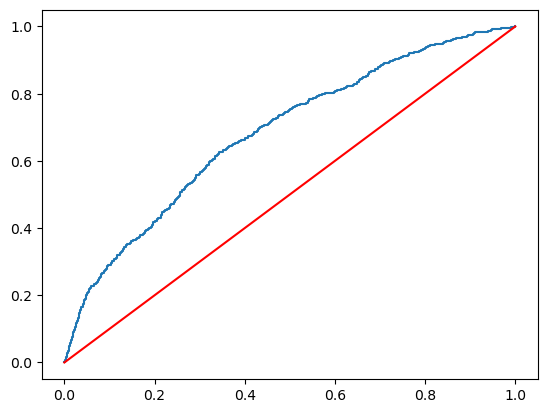

In [11]:
X = df_encoded.drop(columns = 'Exited')
y = df_encoded.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

clasif = LogisticRegression()
clasif.fit(X_train, y_train)

y_pred_train = clasif.predict(X_train)
y_pred = clasif.predict(X_test)

probabs_train = clasif.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, probabs_train[:,1])
roc_auc_train = auc(fpr, tpr)
print(roc_auc_train)

probabs = clasif.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, probabs[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Gráfica de la curva ROC para el conjunto de test
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1), np.linspace(0,1), 'r')
plt.show()

Vemos los coeficientes de la regresión para ver qué variables intervienen más en el modelo:

In [12]:
print(sorted(clasif.coef_[0], reverse = True))
dict(zip(X_train.columns, clasif.coef_[0]))

[0.062349098130468156, 0.001355634359936259, 2.996583460396966e-06, -1.6899706643537388e-06, -0.00017042717013567021, -0.00044373921267362883, -0.0013291313461332047, -0.0014161199572475763, -0.0014368388469694737, -0.001939841060745608, -0.005988565086626901]


{'CreditScore': -0.005988565086626901,
 'Age': 0.062349098130468156,
 'Tenure': -0.0013291313461332047,
 'Balance': 2.996583460396966e-06,
 'NumOfProducts': -0.0014368388469694737,
 'HasCrCard': -0.00017042717013567021,
 'IsActiveMember': -0.001939841060745608,
 'EstimatedSalary': -1.6899706643537388e-06,
 'Geography_Germany': 0.001355634359936259,
 'Geography_Spain': -0.00044373921267362883,
 'Gender_Male': -0.0014161199572475763}

Escalamos las variables y vemos que el modelo funciona mejor

0.7866982976846968
0.8015701986825442


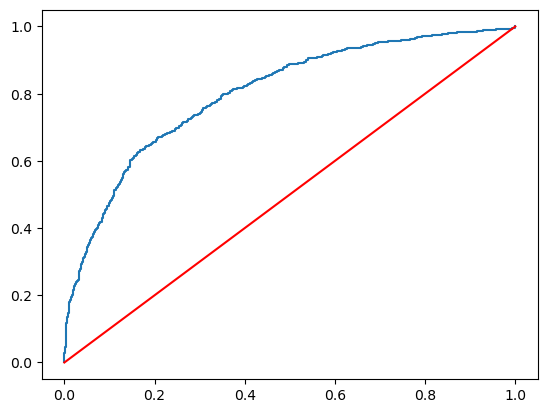

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_esc = scaler.transform(X_train)
X_test_esc = scaler.transform(X_test)

clasif_esc = LogisticRegression()
clasif_esc.fit(X_train_esc, y_train)

y_pred_train = clasif_esc.predict(X_train_esc)
y_pred = clasif_esc.predict(X_test_esc)

probabs_train = clasif_esc.predict_proba(X_train_esc)
fpr, tpr, threshold = roc_curve(y_train, probabs_train[:,1])
roc_auc_train = auc(fpr, tpr)
print(roc_auc_train)

probabs = clasif_esc.predict_proba(X_test_esc)
fpr, tpr, threshold = roc_curve(y_test, probabs[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Gráfica de la curva ROC para el conjunto de test
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1), np.linspace(0,1), 'r')
plt.show()

"Age", "IsActiveMember", "Balance", las geográficas y el género son las variables a las que el modelo atribuye más importancia en la clasificación:

In [14]:
print(sorted(clasif_esc.coef_[0], reverse = True))
dict(zip(X_train.columns, clasif_esc.coef_[0]))

[0.9230639185859802, 0.3717847179137846, 0.0719064944138725, 0.04077146062226599, 0.03376962740314372, 0.019811058216392393, -0.012484641690611146, -0.04427064021310679, -0.21900295042864223, -0.2546530713650922, -0.46979876204584337]


{'CreditScore': -0.04427064021310679,
 'Age': 0.9230639185859802,
 'Tenure': -0.012484641690611146,
 'Balance': 0.0719064944138725,
 'NumOfProducts': -0.21900295042864223,
 'HasCrCard': 0.019811058216392393,
 'IsActiveMember': -0.46979876204584337,
 'EstimatedSalary': 0.04077146062226599,
 'Geography_Germany': 0.3717847179137846,
 'Geography_Spain': 0.03376962740314372,
 'Gender_Male': -0.2546530713650922}

#### Estudiamos las correlaciones entre las variables del dataset:
Existen casos de colinealidad que quizás deberíamos tratar

<Axes: >

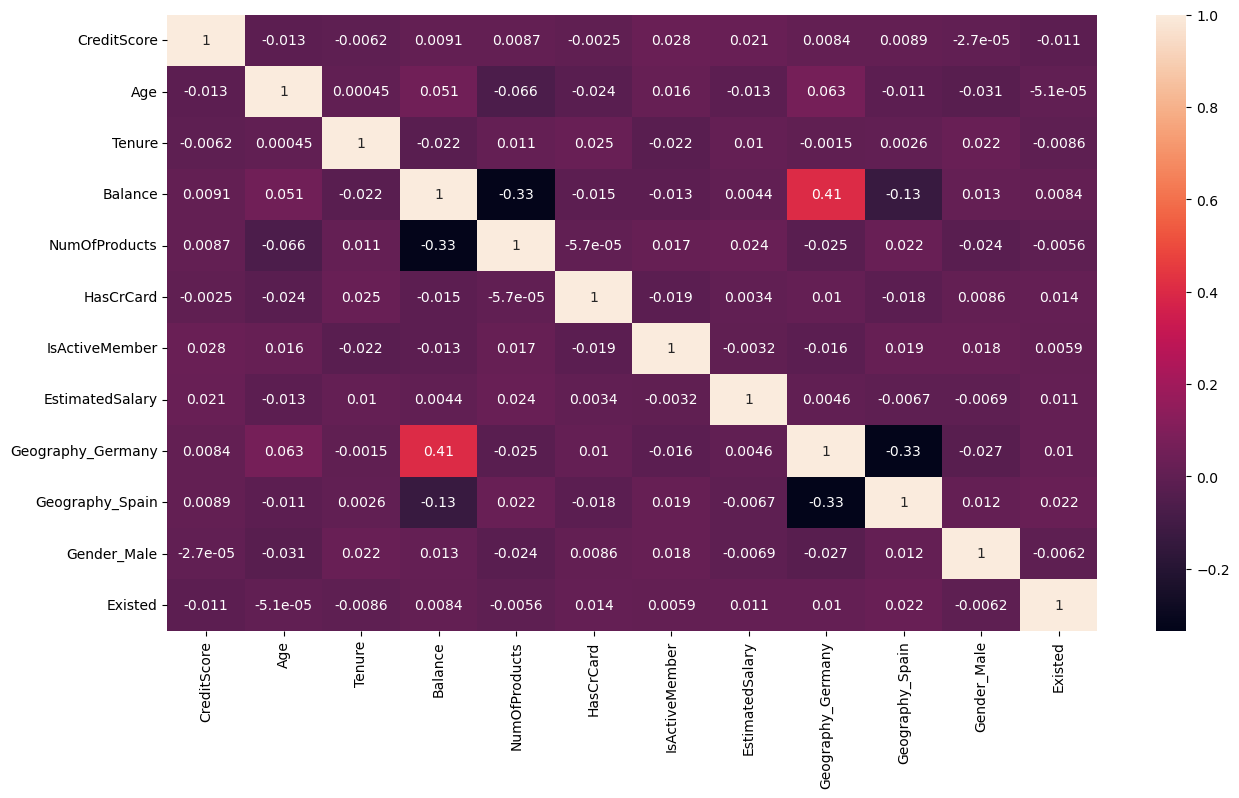

In [15]:
plt.figure(figsize=(15, 8))
df_train_esc = pd.DataFrame(X_train_esc, columns = X_train.columns)
df_train_esc['Existed'] = y_train
sns.heatmap(df_train_esc.corr(), annot = True)

Definimos una fucnión que nos ayudará a probar distintos modelos eliminando distintas variables:

In [40]:
def try_without(df, columns, model, curve = True):

    X = df.drop(columns = columns + ['Exited'])
    y = df.Exited

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_esc = scaler.transform(X_train)
    X_test_esc = scaler.transform(X_test)

    model.fit(X_train_esc, y_train)
    
    try:
        print(f'\nMejores hiperparámetros: {model.best_params_}')
    except AttributeError:
        pass
    
    y_pred_train = model.predict(X_train_esc)
    y_pred = model.predict(X_test_esc)

    probabs_train = model.predict_proba(X_train_esc)
    fpr, tpr, threshold = roc_curve(y_train, probabs_train[:,1])
    roc_auc_train = auc(fpr, tpr)
    recall_train = recall_score(y_train, y_pred_train)
    # Imprimo el AUC y Recall del train para tener una referencia del rendimiento del modelo en el conjunto de entrenamiento y ver si hay sobreajuste
    print(f'\nAUC del train: {roc_auc_train}')
    print(f'Recall del train: {recall_train}')
    
    print('\nMétricas del test:')
    probabs = model.predict_proba(X_test_esc)
    fpr, tpr, threshold = roc_curve(y_test, probabs[:,1])
    roc_auc = auc(fpr, tpr)
    print(f'AUC:{roc_auc}')
    f1 = f1_score(y_test, y_pred)
    print(f'f1 score: {f1}')
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc}')
    precision = precision_score(y_test, y_pred)
    print(f'Precision: {precision}')
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Gráfica de la curva ROC para el conjunto de test
    if curve == True:
        plt.plot(fpr, tpr)
        plt.plot(np.linspace(0,1), np.linspace(0,1), 'r')
        plt.show()

Eliminando "NumOfProducts" y "Geography_Germany"


AUC del train: 0.7733792832129833
Recall del train: 0.26552462526766596

Métricas del test:
AUC:0.7918422564888421
f1 score: 0.35348837209302325
Accuracy: 0.8146666666666667
Precision: 0.6785714285714286
Recall: 0.2389937106918239


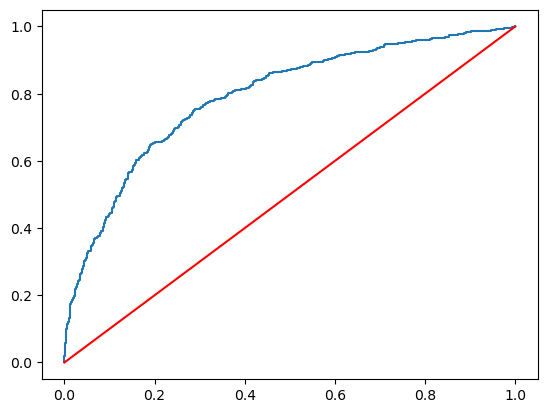

In [17]:
c = ["NumOfProducts", "Geography_Germany"]
M = LogisticRegression()
try_without(df_encoded, c, M)

Eliminando "Balance"


AUC del train: 0.7859385005403355
Recall del train: 0.2890792291220557

Métricas del test:
AUC:0.8001734614606943
f1 score: 0.40707964601769914
Accuracy: 0.8213333333333334
Precision: 0.6865671641791045
Recall: 0.2893081761006289


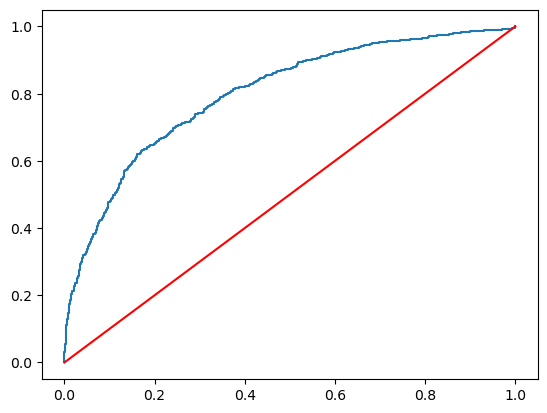

In [18]:
c = ["Balance"]
try_without(df_encoded, c, M)

Eliminando las cuatro menos relevantes


AUC del train: 0.7859385005403355
Recall del train: 0.2890792291220557

Métricas del test:


AUC:0.8001734614606943
f1 score: 0.40707964601769914
Accuracy: 0.8213333333333334
Precision: 0.6865671641791045
Recall: 0.2893081761006289


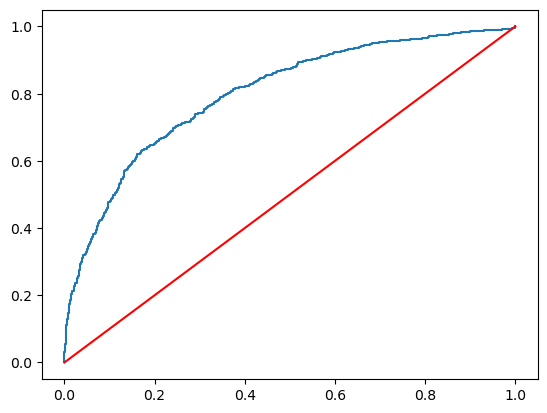

In [19]:
C = ["CreditScore", "HasCrCard", "EstimatedSalary", "Tenure"]
try_without(df_encoded, c, M)

Definimos los modelos con los que vamos a trabajar

In [20]:
M1 = KNeighborsClassifier()
M2 = SVC(probability = True, C = 5)
M3 = RandomForestClassifier()
M4 = xgb.XGBClassifier()


#### Vamos a utilizar Grid Search para hacer una búsqueda de los hiperparámetros óptimos de cada modelo.
La métrica utilizada en scoring será siempre "recall", pues vamos a adoptar el enfoque de MINIMIZAR FALSOS NEGATIVOS y así perder el menor número posible de clientes

Para KNN:

Fitting 5 folds for each of 12 candidates, totalling 60 fits



Mejores hiperparámetros: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

AUC del train: 0.9163514974569105
Recall del train: 0.5474660956459672

Métricas del test:
AUC:0.8064680905404975
f1 score: 0.5463049579045838
Accuracy: 0.8383333333333334
Precision: 0.674364896073903
Recall: 0.4591194968553459


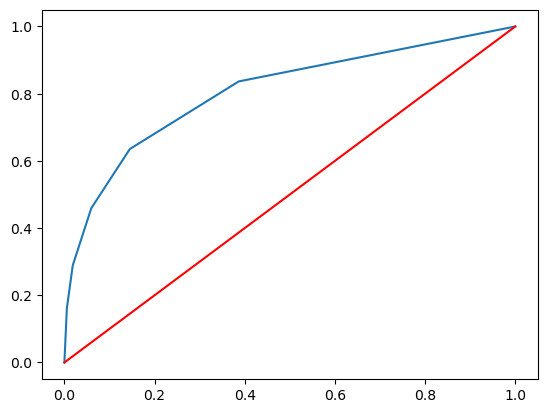

In [22]:
params1 = {'metric': ['minkowski', 'euclidean'], 'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance']}
scoring = 'recall'

grid_M1 = GridSearchCV(estimator = M1, # model to train
                   param_grid = params1, # param_grid
                   scoring = scoring,
                   cv = 5,
                   n_jobs = -1,
                   refit = scoring,
                   verbose = 1)

try_without(df_encoded, C, grid_M1)
# SOBREAJUSTADO

Para Support Vector Machine

In [23]:
M2.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Mejores hiperparámetros: {'C': 3, 'class_weight': 'balanced', 'kernel': 'poly'}

AUC del train: 0.8498439420009615
Recall del train: 0.7487508922198429

Métricas del test:
AUC:0.8503542391639798
f1 score: 0.5953134895503482
Accuracy: 0.787
Precision: 0.4984093319194062
Recall: 0.7389937106918238


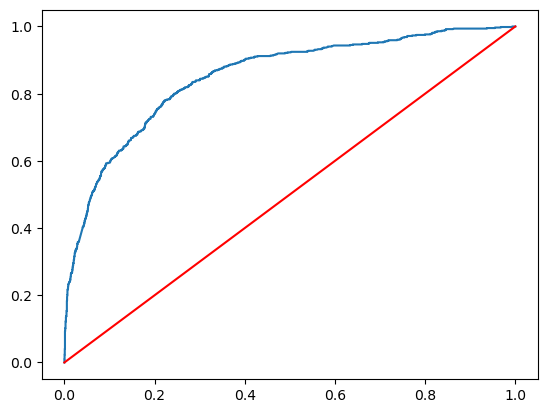

In [24]:
params2 = {'C': [2,3,5,7], 'class_weight': ['balanced'], 'kernel': ["linear", "poly", "rbf", "sigmoid"]}
scoring = 'recall'

grid_M2 = GridSearchCV(estimator = M2,
                   param_grid = params2,
                   scoring = scoring,
                   cv = 5,
                   n_jobs = -1,
                   refit = scoring,
                   verbose = 1)

try_without(df_encoded, C, grid_M2)

Fitting 5 folds for each of 7 candidates, totalling 35 fits



Mejores hiperparámetros: {'C': 3, 'class_weight': 'balanced', 'degree': 3, 'kernel': 'poly'}

AUC del train: 0.8498463004316948
Recall del train: 0.7487508922198429

Métricas del test:
AUC:0.850382506464898
f1 score: 0.5953134895503482
Accuracy: 0.787
Precision: 0.4984093319194062
Recall: 0.7389937106918238


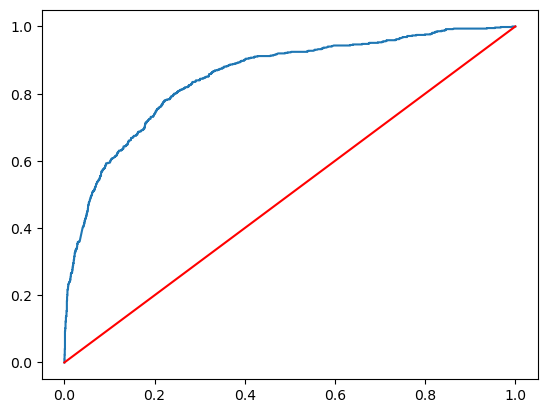

In [25]:
# El SVC con los hiperparámetros 'C': 3, 'class_weight': 'balanced', 'kernel': 'poly' ha dado unos resultados muy buenos. Intentemos mejorarlo ahora buscando el mejor grado para el polinomio del kernel:

params2 = {'C': [3], 'class_weight': ['balanced'], 'degree': [2,3,4,5,6,7,8], 'kernel': ["poly"]}
scoring = 'recall'

grid_M2 = GridSearchCV(estimator = M2,
                   param_grid = params2,
                   scoring = scoring,
                   cv = 5,
                   n_jobs = -1,
                   refit = scoring,
                   verbose = 1)

try_without(df_encoded, C, grid_M2)
# Parece que ya por defecto teníamos el grado óptimo para el kernel

Para Random Forest

In [26]:
M3.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits



Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 500}

AUC del train: 0.9580748142672055
Recall del train: 0.5817273376159886

Métricas del test:
AUC:0.8526405649735551
f1 score: 0.5657764589515333
Accuracy: 0.8536666666666667
Precision: 0.7626666666666667
Recall: 0.449685534591195


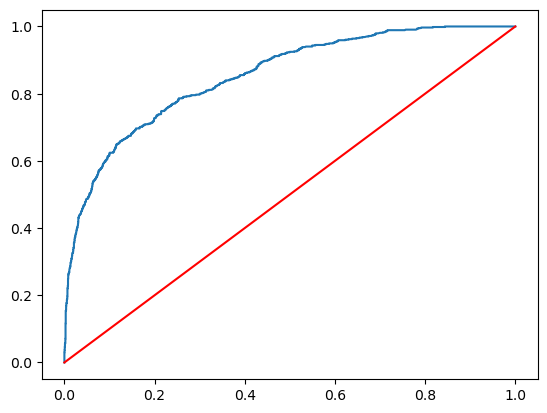

In [27]:
params3 = {'n_estimators': [100, 200, 300, 500], 'max_depth': [5,10, 15, 25], 'min_samples_leaf': [3, 5, 10, 17]}
scoring = 'recall'

grid_M3 = GridSearchCV(estimator = M3,
                   param_grid = params3,
                   scoring = scoring,
                   cv = 5,
                   n_jobs = -1,
                   refit = scoring,
                   verbose = 1)

try_without(df_encoded, C, grid_M3)


AUC del train: 0.8880474602951813
Recall del train: 0.43326195574589577

Métricas del test:
AUC:0.8661599836116166
f1 score: 0.5185972369819342
Accuracy: 0.849
Precision: 0.8
Recall: 0.3836477987421384


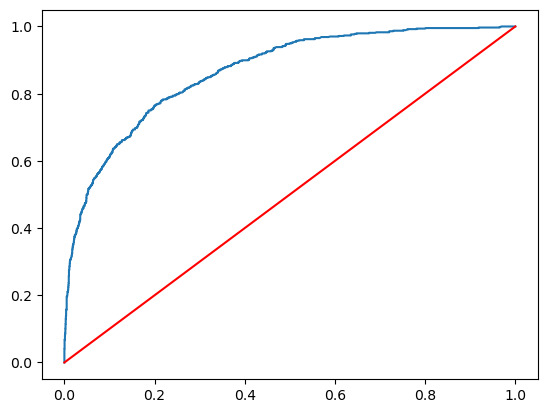

In [28]:
# Menos eficiente pero más estable

try_without(df_encoded, C, RandomForestClassifier(max_depth = 15, min_samples_leaf = 20, n_estimators = 500))

Para el XGBoost

In [29]:
M4.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Mejores hiperparámetros: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

AUC del train: 0.9456643055587958
Recall del train: 0.6680942184154176

Métricas del test:
AUC:0.8338744027285594
f1 score: 0.5565862708719852
Accuracy: 0.8406666666666667
Precision: 0.6787330316742082
Recall: 0.4716981132075472


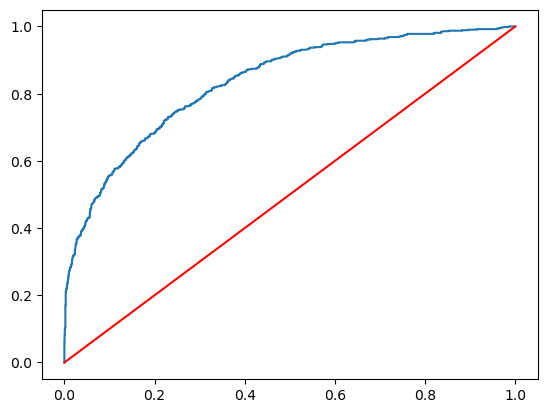

In [30]:
params4 = {'learning_rate': [0.01, 0.08, 0.3, 0.5], 'max_depth': [3, 5, 10], 'n_estimators': [300, 500, 800], 'subsample': [0.5, 0.8, 1]}
scoring = 'recall'

grid_M4 = GridSearchCV(estimator = M4,
                   param_grid = params4,
                   scoring = scoring,
                   cv = 5,
                   n_jobs = -1,
                   refit = scoring,
                   verbose = 1)

try_without(df_encoded, C, grid_M4)


AUC del train: 0.8910984410262921
Recall del train: 0.48394004282655245

Métricas del test:
AUC:0.8704090577743724
f1 score: 0.564870259481038
Accuracy: 0.8546666666666667
Precision: 0.773224043715847
Recall: 0.4449685534591195


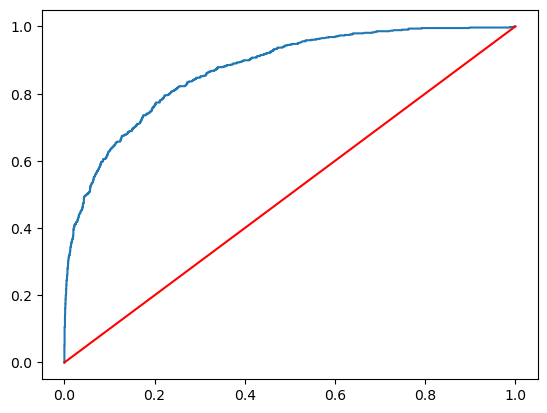

In [31]:
# Corregimos el sobreajuste del modelo partiendo de los valores de hiperparámetros obtenidos del Grid Search y ajustando manualmente
M4 = xgb.XGBClassifier(learning_rate = 0.005, max_depth = 4, n_estimators = 2000, subsample = 0.6)
try_without(df_encoded, C, M4)

Por último, probamos con redes neuronales:

C:\Users\Pablo\AppData\Local\Temp\ipykernel_12664\3685119614.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  M5 = KerasClassifier(build_fn = nnetworks, epochs = 10, batch_size = 100, verbose = 1)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Epoch 1/10
70/70 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.7901
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8174
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.8220
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8283
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8326
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8394
Epoch 7/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8440
Epoch 8/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8453
Epoch 9/10
70/70 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8496
Epoch 10/10
70/70 [==============================] - 0s 2m

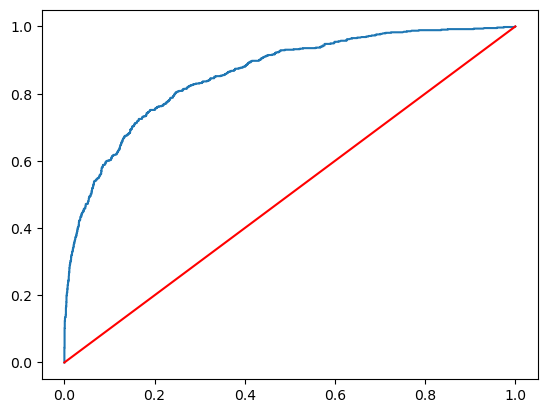

In [32]:
def nnetworks(units1, units2, units3, units4):
    network = Sequential()
    
    network.add(Dense(units1, activation='relu', kernel_regularizer=l2(0.0005), input_shape=(7,)))
    network.add(Dropout(0.2))
    
    network.add(Dense(units2, activation='relu', kernel_regularizer=l2(0.0005)))
    network.add(Dropout(0.2))
    
    network.add(Dense(units3, activation='relu', kernel_regularizer=l2(0.0005)))
    network.add(Dropout(0.2))
    
    network.add(Dense(units4, activation='relu', kernel_regularizer=l2(0.0005)))
    network.add(Dropout(0.2))
    
    network.add(Dense(1, activation='sigmoid'))
    
    network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return network

# Se ha ido iterando el proceso de búsqueda para distintos valores en el diccionario "params5" y se concluye que los valores óptimos están entre estas opciones, resultando ser (como muestra el output de esta celda): 'units1': 100, 'units2': 50, 'units3': 15, 'units4': 15
params5 = {
    'units1': [50, 70, 100],
    'units2': [30, 50, 70],
    'units3': [15],
    'units4': [15]
}

M5 = KerasClassifier(build_fn = nnetworks, epochs = 10, batch_size = 100, verbose = 1)
scoring = 'recall'
grid_M5 = GridSearchCV(estimator = M5,
                   param_grid = params5,
                   scoring = scoring,
                   cv = 5,
                   n_jobs = -1,
                   refit = scoring,
                   verbose = 1)

try_without(df_encoded, C, grid_M5)

Los modelos han proporcionado resultados diversos, pero claramente el que mejor métrica Recall devuelve es SVC. Recordamos que esta métrica es clave en nuestro problema puesto que nos interesa maximizar la capacidad de detectar cuándo un cliente va a cancelar su cuenta (True Positive), para así tratar de evitarlo.

En las siguientes celdas se muestra cómo en una división arbitraria de los datos en conjuntos Train-Test el modelo rinde ligeramente mejor con todas las variables y, sin embargo, tras aplicar validación cruzada, vemos que es al contrario.

In [41]:
svc = SVC(C = 3, class_weight = 'balanced', degree = 3, kernel = 'poly', coef0 = 0.5, probability = True)
try_without(df_encoded, [], svc, curve = False)


AUC del train: 0.8750735416069888
Recall del train: 0.7765881513204854

Métricas del test:
AUC:0.8486236152348114
f1 score: 0.6089171974522293
Accuracy: 0.7953333333333333
Precision: 0.5117773019271948
Recall: 0.7515723270440252


In [42]:
try_without(df_encoded, C, svc, curve = False)


AUC del train: 0.8562921465913854
Recall del train: 0.7494646680942184

Métricas del test:
AUC:0.8630336201300429
f1 score: 0.6064102564102565
Accuracy: 0.7953333333333333
Precision: 0.5119047619047619
Recall: 0.7437106918238994


In [35]:
df1 = df_encoded.drop(columns = ['CreditScore', 'HasCrCard', 'EstimatedSalary', 'Tenure'])

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svc)
])


X = df_encoded.drop(columns='Exited')
y = df_encoded.Exited

auc_cross = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
recall_cross = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

print('Con todas las variables: \n')
print("AUC:", auc_cross)
print("Mean AUC:", auc_cross.mean())
print("Recall:", recall_cross)
print("Mean Recall:", recall_cross.mean())


X = df1.drop(columns='Exited')
y = df1.Exited

auc_cross = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
recall_cross = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

print('\nEliminando variables: \n')
print("AUC:", auc_cross)
print("Mean AUC:", auc_cross.mean())
print("Recall:", recall_cross)
print("Mean Recall:", recall_cross.mean())

Con todas las variables: 

AUC: [0.84637033 0.85077501 0.8455204  0.85017683 0.82707052]
Mean AUC: 0.8439826213776191
Recall: [0.75245098 0.75735294 0.76658477 0.75429975 0.71744472]
Mean Recall: 0.7496266319795731

Eliminando variables: 

AUC: [0.85350773 0.86285903 0.85122642 0.86746222 0.83664404]
Mean AUC: 0.8543398885446549
Recall: [0.75245098 0.7622549  0.76658477 0.75184275 0.72727273]
Mean Recall: 0.7520812256106375


#### Pasamos a entrenar el modelo con todos los datos en df1:

In [37]:
pipeline.fit(X, y)

y_pred = pipeline.predict(X)

AUC = roc_auc_score(y, y_pred)
recall = recall_score(y, y_pred)

print("AUC:", AUC)
print("Recall:", recall)

# POR ALGÚN MOTIVO NO ESTÁ FUNCIONANDO BIEN EL PIPELINE, PUES EL AUC ES MÁS BAJO DE LO QUE DEBERÍA

AUC: 0.7827139708683344
Recall: 0.7648502700049091


In [38]:
scaler = StandardScaler()
scaler.fit(X)

X_esc = scaler.transform(X)

svc.fit(X_esc, y)

y_pred = svc.predict(X_esc)

probabs = svc.predict_proba(X_esc)
fpr, tpr, threshold = roc_curve(y, probabs[:,1])
roc_auc = auc(fpr, tpr)

recall = recall_score(y, y_pred)
AUC_alt = roc_auc_score(y, y_pred)   # Función alternativa para el cálculo de AUC. con el mismo escalado de datos, se obtienen AUC distintos.

print(f'AUC: {roc_auc}, AUC alternativa: {AUC_alt}')
print(f'Recall: {recall}')

AUC: 0.8626109551471827, AUC alternativa: 0.7827139708683344
Recall: 0.7648502700049091


In [39]:
# EL PROBLEMA PARECE ESTAR EN QUE LAS FUNCIONES roc_auc_score Y auc PROPORCIONAN VALORES DISTINTOS.
# EN LA CELDA ANTERIOR SE UTILIZAN AMBAS EN LAS MISMAS CONDICIONES Y SE OBTIENEN RESULTADOS DISTINTOS.
# LEYENDO UN POCO ACERCA DE AMBAS FUNCIONES, PARECE QUE ES NORMAL QUE HAYA LIGERAS DIFERENCIAS (AUNQUE ESTA NO ME PARECE TAN LIGERA) DEBIDO A QUE CALCULAN EL AUC CON ENFOQUES DISTINTOS.